# Machine Learning: No deep Learning

This lesson presents non-deep learning based models: the basic ideas, the mathematical derivations and implementations. [@Taib](https://github.com/Taib)

**Summary**
1. [Binary Logistic Regression](#blr)
2. [Multiclass Logistic Regression](#mclr)
3. [Linear Support Vector Machine](#lsvm)
2. [Kernel Support Vector Machine](#ksvm)

## 1. <a class="anchor" id="blr" > Binary Logistic Regression </a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

### 1.1 Formulation

**Logistic Regression is a classification model where the prediction is based on the sigmoid function.**
> The prediction function $f$ is defined as: $$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = \frac{1}{1 + exp( -( \mathbf{x}^T\mathbf{w} + b))}  \overset{\text{def}}{=} sigmoid( \langle \mathbf{x}, \mathbf{w} \rangle + b)).$$

> Then, the class $y$ of the query $\mathbf{x}$ is given by:
$$
\begin{equation*}
    y = \begin{cases}
            1  & \text{if } f(\mathbf{x}; \theta) \ge \frac{1}{2}, \\
            0  & \text{otherwise}. \\
        \end{cases}
\end{equation*}
$$

As we've seen, in the previous lecture, to obtain an "appropiate" set of parameter $\theta$, we need to optimize a certain loss function on our dataset. 

**Plotting a sigmoid function**

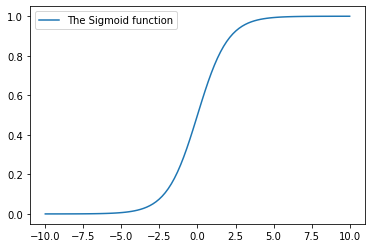

In [1]:
import numpy as np
import pylab as plt

sigmoid = lambda t : 1./(1. + np.exp(-t))

x_coords = np.linspace(-10, 10, 100) 
plt.plot(x_coords, sigmoid(x_coords))
plt.legend(["The Sigmoid function"])
plt.show()

### 1.2 <a class="anchor" id="blr-loss">The Log-Likelihood as loss function</a>

#### 1.2.1 Formulation

We will use a probabilistic interpretation of the sigmoid prediction function (as a **Bernouilli distribution**). Let 
$$
\begin{equation*}
    \begin{split}
        p(y=1 | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta), \\ 
        p(y=0 | \mathbf{x}; \theta) &= 1 - f(\mathbf{x}; \theta). 
    \end{split}
\end{equation*}
$$

The **likelihood**, $L(\theta)$, is defined as 
$$
\begin{equation*}
    \begin{split} 
        L(\theta) = p(y | \mathbf{x}; \theta) &= f(\mathbf{x}; \theta)^y (1 - f(\mathbf{x}; \theta))^{(1-y)}, & \\
        &= \Pi_{i=1}^n f(\mathbf{x}_i; \theta)^{y_i} (1 - f(\mathbf{x}_i; \theta))^{(1-y_i)}.  & \quad \text{ (the samples are i.i.d)}\\
    \end{split}
\end{equation*}
$$

To convert the product between the terms and obtain a concave function, we will apply the $\log$.

The **Log-likelihood** is 
$$ 
\begin{equation*}
    \begin{split} 
    \log L(\theta) &=  \frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)), \\
    &= \sum_{i=1}^n y_i \log(\exp(- (\mathbf{x}_i^T \mathbf{w} + b )) + 1) + (1 - y_i) \log(\exp(\mathbf{x}_i^T \mathbf{w} + b) + 1)\\
    \end{split}
\end{equation*}  
$$

We now convert this log-likelihood into a convex function that we can, then, minimize to update our parameters. 

The standard logistic regression loss function is given by the **negative log-likelihood** (*a.k.a* the **cross-entropy** loss):
$$\mathcal{L}(\theta) = - \log L(\theta).$$

Now, to actually update our parameters, we will use a **gradient descent** technique as introduced in the previous lecture. To do so, we will need the gradients of the loss w.r.t the parameters. 

The gradients of the loss w.r.t the parameters $(\mathbf{w}, b)$, are:

$$
\begin{equation*}
    \begin{split} 
            \nabla_{\mathbf{w}} \mathcal{L}(\theta) &= - \sum_{i=1}^n y_i \nabla_{\mathbf{w}}  \log f(\mathbf{x}_i; \theta) + (1-y_i) \nabla_{\mathbf{w}}  \log (1 - f(\mathbf{x}_i; \theta)), \\
            &=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big)\nabla_{\mathbf{w}} f(\mathbf{x}_i; \theta), \\
            &= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{\mathbf{w}} (\mathbf{x}_i^T\mathbf{w} + b), \\
            &= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \ \mathbf{x}_i , \\
            &= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)  \mathbf{x}_i
    \end{split}
\end{equation*}
$$

$$
\begin{equation*}
    \begin{split} 
        \nabla_{b} \mathcal{L}(\theta) &=  - \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) \nabla_{b} (\mathbf{x}_i^T\mathbf{w} + b), \\
        &= -  \sum_{i=1}^n \big(y_i \frac{ 1 }{ f(\mathbf{x}_i; \theta)} + (1-y_i)  \frac{  (-1) }{1 - f(\mathbf{x}_i; \theta)} \big) f(\mathbf{x}_i; \theta) (1 - f(\mathbf{x}_i; \theta) ) , \\
        &= -  \sum_{i=1}^n \big( y_i   -   f(\mathbf{x}_i; \theta)  \big)
    \end{split}
\end{equation*} 
$$

#### 1.2.2 Implementing a Logistic Regressor

- **Designing the Logistic Model**

In [2]:
import numpy as np

class MyBinaryLogisticRegression:
    def __init__(self, n_iter, lr, regul='l2', r_lambda=0.):
        """
        A class for binary logistic regression model
         
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate
        regul: (str) ('l2' or 'l1')
            Type of regularization (see the regularized Logistic Regression)
        """

        self.n_iter = n_iter
        self.lr = lr
        self.r_lambda = r_lambda
        self.regul = regul
        
        self.losses = []
        self.grads = []

    def init_params(self, n_feats):
        self.w = np.zeros((1, n_feats))
        self.b = 0.
        
    def _optimize(self, X, y):
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*(np.sum((y*np.log(probs)) + ((1-y)*(np.log(1-probs)))))

        # computing the gradient 
        dw = (1/m)*(np.dot((probs - y), X)) 
        
        if self.regul == "l2":
            dw += 2*self.r_lambda* self.w # adding l2 regularization
        elif self.regul == 'l1':
            dw + self.r_lambda * np.sign(self.w) # adding l1 regularization
            
        db = (1/m)*(np.sum(probs - y))

        grads = {"dLdw": dw, "dLdb": db}

        return grads, cost

    def activation(self, X):  
        """
            Compute the Sigmoid activation on the dataset
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """          
        return 1./(1. + np.exp(-np.dot(self.w, X.T) - self.b))
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
            y: (np-array) shape=( n_samples)
                targets 
        """
        
        self.init_params(X.shape[1])
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, y)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            #if (i % 10 == 0):
            #    print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return activ >= 0.5 
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

- **To Try out our model, we start by generating a random binary dataset**

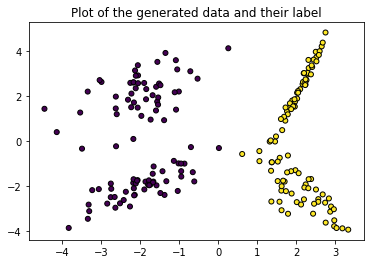

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

# we create 200 separable points
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=2, class_sep=2.0)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
plt.title('Plot of the generated data and their label')
plt.show()

- **Instanciating the model and training**

In [4]:
my_clf = MyBinaryLogisticRegression(n_iter=100, lr=0.1)
my_clf.fit(X, y)

Standard Logistic Regression: Iter 99, Cost 0.049400954013167915


- **Plotting the decision boundary of our Binary Logistic Regressor**

In [5]:
def print_decision(X, y, clf, title="Decision Boundary"):
    plt.figure()
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(111)
    ax.contourf(xx, yy, Z, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', s=25) 
    plt.title(title)

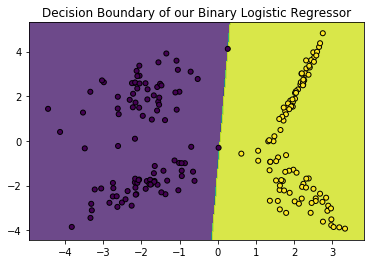

In [6]:
print_decision(X, y,  my_clf, "Decision Boundary of our Binary Logistic Regressor")

### 1.3 The regularized Log-Likelihood as loss function

#### 1.3.1 Formulation

The **regularized** logistic regression loss function consists in assuming that the parameters follow a certain *a priori* distribution.

We then used the **maximum a posteriori (MAP)** estimation to derive the final loss function.

Let $p(\theta)$ be the *a priori*.

The goal is to minimize
$$
\begin{equation}
    \begin{split} 
        \mathcal{L}(\theta) &= - \log L(\theta)p(\theta), \\
        &= - \log L(\theta) - \log p(\theta).
    \end{split}
\end{equation}
$$

1. The $\ell_2$ regularization: the *a priori* is given by:
$$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|\mathbf{w}\|_2^2),$$
in other words, we assume that $p \sim \mathcal{N}(\mathbf{0}, \sqrt{\frac{2}{\lambda}} I)$. 

2. The $\ell_1$ regularization: the *a priori* is given by : 
$$p(\theta = \{\mathbf{w}\}) = exp( - \lambda \|\mathbf{w}\|_1)$$
in other words, we assume that $p \sim \text{ Laplace}(\mathbf{0}, \frac{1}{\lambda} I)$.

> Note that, the use of the $\ell_1$ regularization encourages the obtained set parameters to be **sparse**. 
- That is, most of the elements in $\mathbf{w}$ will be null. 

Therefore, depending on the *a priori*, the regularized loss is given by
1. for the $\ell_2$ regularization: 

$$ \mathcal{L}(\theta)  =   -\frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta))  + \lambda \|\mathbf{w}\|_2^2 ,$$

2. for the $\ell_1$ regularization: 

$$ \mathcal{L}(\theta)  =   -\frac{1}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)) + \lambda \|\mathbf{w}\|_1 , $$
where $\lambda \in \mathbb{R}$ balances the importance of the terms. 

> Note that, the above two equations can be rewritten as 
$$ \mathcal{L}(\theta)  =   -\frac{C}{n}\sum_{i=1}^n y_i \log f(\mathbf{x}_i; \theta) + (1-y_i) \log (1 - f(\mathbf{x}_i; \theta)) + \underbrace{\phi(\theta)}_{\text{regularization }(\ell_2, \ell_1)}, $$ 
where $C \in \mathbb{R}$. Note that, this formulation is used in the *Scikit-learn* library.

#### 1.3.2 Example using the scikit-learn model

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(C=50. / 100 , penalty='l2', tol=0.1)
clf.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

score: 1.0, sparsity: 0.0 


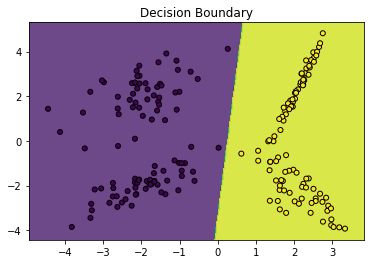

In [9]:
print_decision(X, y, clf)
print("score: {}, sparsity: {} ".format(clf.score(X, y), np.mean(clf.coef_ == 0) * 100))

## 2. <a class="anchor" id="mclr">Multi-class classification</a> 

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{0, \cdots, C-1\})\}_{i=1}^n$ be our training dataset, where $C$ is the number of classes. The samples are **i.i.d**.

<img src="images/binary_vs_multi_classif.png" width="90%"/>

### 2.1 Formulation

In the case of multi-class tasks, the multinomial logistic regression can be used (*a.k.a.* **softmax regression**). The probability to obtain the class $c$ given an input $\mathbf{x}$ is given by
$$f(\mathbf{x}; \theta)[c] = p(y = c | \mathbf{x}; \theta) = \frac{exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})}, $$
where $(\mathbf{w}^{(k)}, b^{(k)})$ are the parameter set dedicated to the $k$-th class.

> Another way of working with multi-class data is to use a **one-versus-all** strategy. In other words, for each class, $c$, we train a binary logistic regressor where we label $c$ as $1$ and the other classes as $0$. And, at test time, we consider the argmax across all the regressors.

Notice that we can retrieve the binary formulation from the multinomial definition. Say we have two class 0 and 1, then 
$p(y = 1 | \mathbf{x}; \theta) = \frac{exp\big( \mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big)}{ exp\big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) + exp\big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)}\big)} = \frac{1 }{1 + exp\Big( \big( \mathbf{x}^T\mathbf{w}^{(0)} + b^{(0)} \big) - \big(\mathbf{x}^T\mathbf{w}^{(1)} + b^{(1)}\big) \Big)} = \frac{1 }{1 + exp \Big(  \mathbf{x}^T \big(\mathbf{w}^{(0)} - \mathbf{w}^{(1)} \big) +  \big(b^{(0)} -  b^{(1)}\big) \Big)}.$

> **N.B.**: The sofmax function is defined as 
$ \mathbf{t} \in \mathbb{R}^C \mapsto \text{softmax} (\mathbf{t}) = \frac{1 }{\sum_{k=1}^C e^{\mathbf{t}[k]}}\Big[e^{ \mathbf{t}[1]}, e^{ \mathbf{t}[2]}, \cdots, e^{ \mathbf{t}[C] }\Big] $.

### 2.2 The Loss function

Given a data point $\mathbf{x}$, the likelihood is given by
$$
 L(\theta) = p(y|\mathbf{x}; \theta) = \Pi_{k=1}^C p(y = k|\mathbf{x}; \theta)^{\mathbb{1}\{y=k\}},
$$

where $\mathbb{1}\{\cdot\}$ is the indicator function.

And the negative log-likelihood, our multi-class loss function, is
$$
 \mathcal{L}(\theta) = -\log L(\theta) = p(y|\mathbf{x}; \theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta).
$$

> Note we can add an additional regularization term. Using the same derivation given in the binary logistic section, we obtain the new regularized loss as
$$
 \mathcal{L}(\theta) = -\log L(\theta) p(\theta) = - \sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta) + \lambda \phi(\theta),
$$
where $\phi$ can be any regularization function including the $\ell_2$-norm or the $\ell_1$-norm.

The gradient w.r.t. to the $c$-th parameter $\mathbf{w}^{(c)}$ is
$$
\begin{equation*}
    \begin{split} 
         \nabla_{\mathbf{w}^{(c)}} - \log L(\theta) &= - \nabla_{\mathbf{w}^{(c)}}  \Big(\sum_{k=1}^C {\mathbb{1}\{y=k\}} \log p(y = k|\mathbf{x}; \theta) \Big),\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \nabla_{\mathbf{w}^{(k)}} p(y = c|\mathbf{x}; \theta) ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \nabla_{\mathbf{w}^{(k)}} \frac{exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})}{\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)})} ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big)\frac{\nabla_{\mathbf{w}^{(k)}} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) \big)\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) -  exp(  \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})\nabla_{\mathbf{w}^{(k)}} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) }{\big(\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) \big)^2} ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big)  \frac{\mathbf{x} \big( exp( \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)}) \big)\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) -  exp(  \mathbf{x}^T\mathbf{w}^{(c)} + b^{(c)})^2 \mathbf{x}}{\big(\sum_{k=1}^C exp( \mathbf{x}^T\mathbf{w}^{(k)} + b^{(k)}) \big)^2} ,\\
         &= -  \big( {\mathbb{1}\{y=c\}} \frac{1}{p(y = c|\mathbf{x}; \theta)} \big) \big( \mathbf{x} p(y = c|\mathbf{x}; \theta) - p(y = c|\mathbf{x}; \theta)^2\mathbf{x} \big) ,\\
         &=-\big({\mathbb{1}\{y=c\}} -  \mathbb{1}\{y=c\} p(y = c|\mathbf{x}; \theta) \big) \mathbf{x}.
    \end{split}
\end{equation*}
$$

### 2.3 Example  (MNIST: handwritten digits classification)

The main objective is to predict the digit inside an input image.
<img src="images/mnist_goal.png" width="40%">

The practical workflow is depicted below. 

1. Flattening the image to obtain a vector (*a.k.a* the **the feature vector**)
2. Applying the model
3. Using the argmax to retrieve the final output

<img src="images/mnist_practical.png" width="40%">

#### Import the important libraries
- **fetch_openml** will be used to retrieve the dataset
- **LogisticRegression** is the scikit-learn class for this type of model
- **train_test_split** is used to split dataset into 2 folds (train and test) eventually 3 with additional validation set
- **StandardScaler** is used to normalize the data by substracting the mean and dividing by the variance
- **check_random_state** is used to randomly permutate the data

In [8]:
import os
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


#### We fix the number of training sample 

In [9]:
train_samples = 5000

In [10]:
def one_hot_encode(y):
    """
        Convert a vector of targets [1, 2, 0] to its one-hot encoded 
        version, which is the matrix [[0, 1, 0], [0, 0, 1], [1, 0, 0]].

        y: (np-array) shape=( n_samples)
            targets 
    """
    v = np.zeros((y.size, len(np.unique(y))))
    v[np.arange(y.size), y.astype(int)] = 1
    return v


#### Data acquisition and preprocesing
1. Load the MNIST data from https://www.openml.org/d/554
2. Shuffling the data randomly
3. Splitting the data into **Train** and **Test** sets
4. Normalizing the data

In [13]:
# Loading the images

# Loading the images
if not os.path.exists("mnist_784_data.pkl"):
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = one_hot_encode(y.astype(int))
    with open('mnist_784_data.pkl','wb') as f:
         pickle.dump([X, y], f) 
else:
    with open('mnist_784_data.pkl','rb') as f:
        X, y = pickle.load(f)
        
# shuffling part
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Initializing the classifier

In [14]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l2', solver='saga', tol=0.1
)

#### Training the classifier

In [16]:
clf.fit(X_train, np.argmax(y_train, 1))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

#### Printing some metrics:
- The sparsity level
- The Test score

In [18]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, np.argmax(y_test, 1))

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 16.71%
Test score with L1 penalty: 0.8699


**Plotting some test images and there predictions**

In [73]:
def plot_mnist_predictions(clf, X, y, title='Classification vector for...'):
    plt.figure(figsize=(10, 5)) 
    for i in range(10):
        pred_plot = plt.subplot(2, 5, i + 1)

        pred = clf.predict(X[i:i+1])

        pred_plot.imshow(X_test[i].reshape(28, 28), interpolation='nearest', 
                         cmap=plt.cm.gray)
        pred_plot.set_xticks(())
        pred_plot.set_yticks(())
        pred_plot.set_xlabel('Pred: %s, True: %s' %(int(pred[0]), np.argmax(y[i])))
    plt.suptitle(title)
    plt.show()

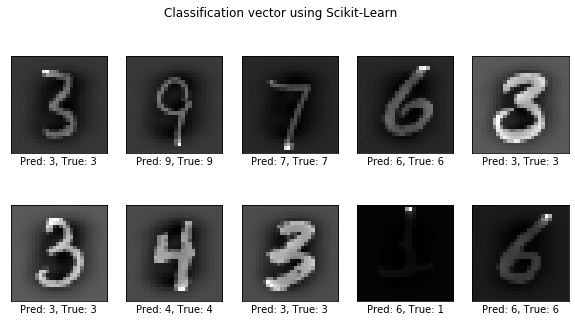

In [74]:
plot_mnist_predictions(clf, X_test, y_test, 'Classification vector using Scikit-Learn')

#### Plotting the learned parameters

In [20]:
def plot_coefs(coef, title='Classification vector for...'):
    plt.figure(figsize=(10, 5))
    scale = np.abs(coef).max()
    for i in range(10):
        l1_plot = plt.subplot(2, 5, i + 1)
        l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
        l1_plot.set_xticks(())
        l1_plot.set_yticks(())
        l1_plot.set_xlabel('Class %i' % i)
    plt.suptitle(title)
    plt.show()

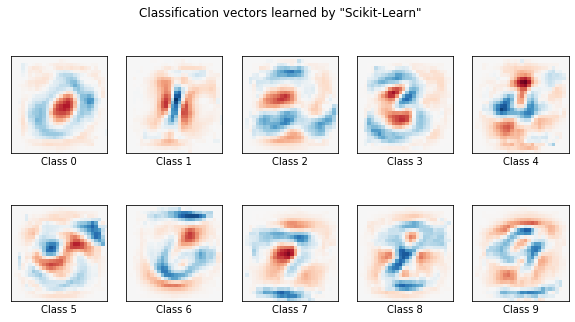

In [21]:
plot_coefs(clf.coef_.copy(), title='Classification vectors learned by "Scikit-Learn"')

### 2.4 Coding a Multi-Class Logistic Regressor  (test on MNIST)

#### 2.4.1 Designing the model

In [62]:
class MyMultiClassLogisticRegression:
    def __init__(self, n_iter, lr, regul="l2", r_lambda=0.1):
        """
            A class for multiclass logistic regression model

            n_iter: (integer)
                Number of training iteration
            lr: (float)
                learning rate  
            regul: (str) ('l2' or 'l1')
                the type of regularization
            r_lambda: (float)
                regularization coefficient
        """
        
        self.n_iter = n_iter
        self.lr = lr
        self.regul = regul
        self.r_lambda = r_lambda 
        
        self.losses = []
        self.grads = []
    
    def init_params(self, n_feats, n_class):
        self.W = np.zeros((n_class, n_feats))
        self.b = np.zeros(n_class)

    def _optimize(self, X, y):
        """
            Computing the loss and the gradients
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
            y: (np-array) shape=(n_samples x n_class)
                one-hot endoded representation of the targets  
        """
        m = X.shape[0]

        # cost function
        probs = self.activation(X) 
        cost = (-1/m)*np.sum(y*np.log(probs))
         
        # computing the gradient 
        dw = []; db = []
        for i in range(self.W.shape[0]):
            dw.append(-(1/m) * (np.dot((- y[:, i]*probs[:, i] + y[:, i]), X)))  
            
            if self.regul=='l2':
                dw[-1] += 2*self.r_lambda*self.W[i] # adding l2 regularization
            elif self.regul == 'l1':
                dw[-1] += self.r_lambda*np.sign(self.W[i]) # adding l1 regularization
                
            db.append(-(1/m) * np.sum(-y[:, i]*probs[:, i] + y[:, i]) )

        grads = {"dLdw": np.array(dw), "dLdb": np.array(db)}

        return grads, cost

    def activation(self, X):  
        """
            Compute the softmax activation across the data
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
        """
        vect_of_exponents = np.exp(np.dot(X, self.W.T) + self.b) 
        return vect_of_exponents/ np.tile(np.sum(vect_of_exponents, 1), (self.W.shape[0],1)).T
    

    def fit(self, X, y):
        """
            Training the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix
            y: (np-array) shape=( n_samples)
                targets 
        """
        one_hot_labels = y
        if y.ndim < 2:
            one_hot_labels = one_hot_encode(y) 
        self.init_params(X.shape[1], y.shape[1])
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, one_hot_labels)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.W = self.W - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            #if (i % 10 == 0):
            #    print("Multiclass Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Multiclass Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        activ = self.activation(X)
        return np.argmax(activ, 1)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (np-array) shape=(n_samples x n_feats)
                data matrix 
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

#### 2.4.2 Creating an instance of the model

In [63]:
my_mclr = MyMultiClassLogisticRegression(n_iter=100, lr=0.001, regul="l2", r_lambda=0.1)

#### 2.4.3  Training our model

In [64]:
my_mclr.fit(X_train, y_train)

Multiclass Logistic Regression: Iter 99, Cost 1.6857251595767362


#### 2.4.4  Computing some metrics

In [65]:
sparsity = np.mean(my_mclr.W == 0) * 100
score = my_mclr.score(X_test, np.argmax(y_test))

print("Sparsity: %.2f%%" % sparsity)
print("Test score: %.4f" % score)

Sparsity: 16.71%
Test score: 0.1110


#### 2.4.4  Plotting some classification results

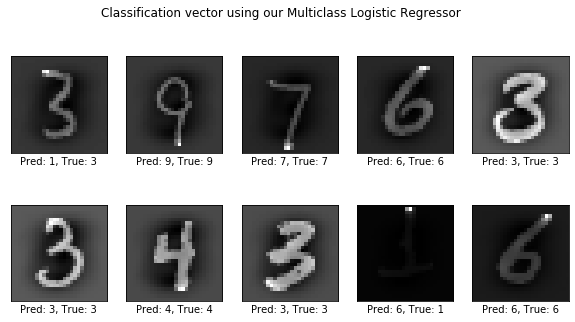

In [76]:
plot_mnist_predictions(my_mclr, X_test, y_test, 'Classification vector using our Multiclass Logistic Regressor')

#### 2.4.4  Plotting the weights, $\mathbf{w}$'s, learned by the model

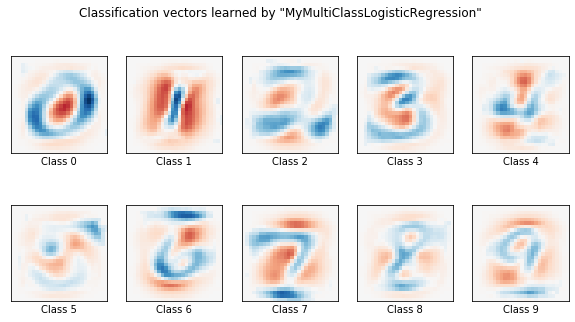

In [66]:
plot_coefs(my_mclr.W.copy(), title='Classification vectors learned by "MyMultiClassLogisticRegression"')

#### 2.4.3  Trying out our Multiclass Logistic Regression model on a randomly generated datase

Multiclass Logistic Regression: Iter 99, Cost 1.1735651359629335


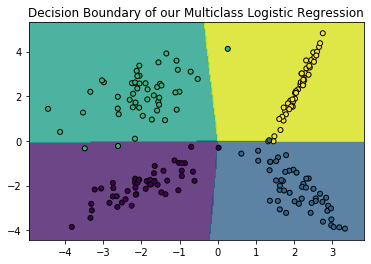

In [25]:
from sklearn.datasets import make_classification
X_mclr, y_mclr = make_classification(n_samples=200, n_classes=4, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1, class_sep=2.0)

my_mclr.fit(X_mclr, y_mclr)
print_decision(X_mclr, y_mclr, my_mclr, "Decision Boundary of our Multiclass Logistic Regression")

## 3. <a class="anchor" id="lsvm">Linear Support Vector Machine (SVM)</a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{-1, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

> Recall that in the Logistic regression model, the prediction function was defined using the sigmoid as **activation** function: $$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = \frac{1}{1 + exp( -( \mathbf{x}^T\mathbf{w} + b))} \overset{\text{def}}{=} sigmoid( \langle \mathbf{x}, \mathbf{w} \rangle + b)).$$

In this section, we will use the sign function as activation function: 
$$ \mathbf{x} \mapsto f(\mathbf{x}; \theta=\{\mathbf{w}, b\}) = sign(\langle \mathbf{x}, \mathbf{w} \rangle + b).$$

> Therefore, the sample $\mathbf{x}_i$ is well classified iif $y_i (\langle x, w \rangle + b ) \ge 1$.

We have seen that the Logistic Regression model can be used to find a hyperplane that separates the data. 

However, we can notice that, actually one can have infinite number of hyperplanes that work fine on the dataset. The question is which one to choose?

    The idea introduce by Vapnik, in the 90's, is to say a good hyperplane should be robust to small perturbations in the training set. 

In other words, we should maximize the so called **margin** defined as the minimum distance between all the samples and the hyperplane. See the figure below for illustration.

<img src="images/intro_to_margin.png">

### 3.1 Hard SVM

Suppose our dataset is **separable**, that is, there exists a hyperplane that perfectly seperate the classes.

In such separable case, let $\mathbf{x}_1$  be one of the closest positively labeled (with $y_1 = 1$) points to the hyperplane (if not the closest) and $\mathbf{x}_2$ is chosen similarly among the negatively labeled points. 

Upon normalizing with a constant, we can write
$$
\begin{equation*}
\begin{split}
    \langle \mathbf{x}_1, \mathbf{w} \rangle + b &= 1, \\
    \langle \mathbf{x}_2, \mathbf{w} \rangle + b &= -1. \\
\end{split}
\end{equation*}
$$

<img src="images/hard_svm.png">

**Note**: The samples that satifies $y_i  \langle \mathbf{x}_i , \mathbf{w} \rangle + b = 1 $ are the so called **support vectors**. 

Using the notation given in the above Figure, we have:
$$
\begin{equation*}
\begin{split}
 \langle \frac{\mathbf{w}}{\|\mathbf{w}\|_2^2},  \mathbf{x}_1 - \mathbf{x}_2 \rangle &= 2Margin = d, \\
  \langle\mathbf{x}_1 - \mathbf{x}_2 , \mathbf{w} \rangle &= 2, \\
     &  \Rightarrow Margin = \frac{1}{\|\mathbf{w} \|_2^2} & \\
\end{split}
\end{equation*}
$$

Therefore, maximizing the margin is equivalent to minimizing the $\ell_2$-norm of $\mathbf{w}$.

> Finally, the (*primal*) hard SVM optimization problem is given by
$$
\begin{equation*}
    \begin{split}
        \text{minimize } & \frac{1}{2} \| \mathbf{w}\|_2^2  \\
        & \text{s.t.} \quad 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \le 0 \quad \forall i \in \{1, \cdots, n\}.
    \end{split}
\end{equation*}
$$

> And the Lagrangian $L_H$ of the Hard SVM is given by
$$
\begin{equation*} 
        L_H(\mathbf{w}, b, \alpha) =   \frac{1}{2} \| \mathbf{w}\|_2^2  + \sum_{i=1}^n \alpha_i\big( 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big),
\end{equation*}
$$where the $\alpha_i$'s are the so called **Lagrangian multipliers** $(\alpha_i \ge 0, \ \forall i)$.

We can therefore solve this convex optimization problem. However, we made a strong assumption that the dataset is separable while in practice this is generally not the case. We shall now introduce the Soft SVM that handles this assumption issue.

### 3.2 Soft SVM

Now we don't assume any separability condition on the dataset, and our main goals are:
1. maximizing the margin
2. minimizing an error related to the number of wrongly classified samples

    Vapnik defined the error in the second point as: the distance needed to move wrongly classified point to get it on the correct side of the hyperplane.

To minimize that error, we introduce new (*slack*) variables, $\xi_i$ is the distance needed to move the $i$-th sample to the correct side of the hyperplane. Note that $\xi_i = 0$ if the sample is well classified.  See the figure below for illustration.

<img src="images/soft_svm.png">

Formally, this consists in relaxing our constrains by adding the new variables. The new constrains are
$$
\begin{equation}
    \begin{split}
        y_i (\langle \mathbf{x}, \mathbf{w} \rangle + b) &\ge 1 - \xi_i \quad \forall i \in \{1, \cdots, n\},\\
        \xi_i &\ge 0
    \end{split}
\end{equation}
$$

> The (*primal*) Soft SVM optimization problem is given by
$$
\begin{equation*}
    \begin{split}
        \underset{\mathbf{w}, \xi}{\text{minimize }} && \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \xi_i & \\
        & \text{s.t. } & \quad 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) &\le \xi_i \quad \forall i \in \{1, \cdots, n\}\\
        & &\quad \xi_i  \ge 0 \quad \forall i \in \{1, \cdots, n\},
    \end{split}
\end{equation*}
$$ where $\xi = [\xi_1, \cdots, \xi_n]$.

Suppose $\mathbf{w}$ and $b$ are fixed. We  want that, $ \xi_i \ge 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b), \ \forall i$, and $\xi_i \ge 0$. Therefore, we have:
$$
\xi_i = \max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big).
$$

> The final (*unconstrained*) Soft SVM optimization problem is 
$$
\underset{\mathbf{w}, b}{\text{minimize }} \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \max \big( 0, 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big),
$$
where the function $ x \mapsto \max ( 0, 1 - x) \overset{\text{def}}{=} (1-x)_+$ is known as the **Hinge Loss**.

### 3.3 Optimization

#### 3.3.1  Optmization of the unconstrained Soft SVM problem

Let $\mathcal{L}$ be the objective function we wish to minimize: $$\mathcal{L}(\theta = \{\mathbf{w}, b\}) = \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \big(1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big)_+.$$

This loss being convex (sum of two convex functions), the standard gradient descent technique can be efficiently applied to minimize it. Let's compute the gradients w.r.t to the parameters.

>$$
\begin{equation*}
    \begin{split}
        \nabla_{\mathbf{w}}  \mathcal{L}(\theta) &= \mathbf{w} + \frac{1}{n} \sum_{i=1}^n \begin{cases}
             0  & \text{if } \big(1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big)_+ = 0 \\
              - C  y_i \mathbf{x}_i & \text{otherwise }
       \end{cases}, \\  
       &\\
        \nabla_{b}  \mathcal{L}(\theta) &= \frac{1}{n} \sum_{i=1}^n \begin{cases}
             0  & \text{if } \big(1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big)_+ = 0 \\
             -C y_i  & \text{otherwise }
       \end{cases}.
    \end{split}
\end{equation*}
$$

#### 3.3.2 Optimization of the constrained Soft SVM problem using the dual

> Recall that the constrained Soft SVM Problem (the *primal*) is defined as
$$
\begin{equation*}
    \begin{split}
        \underset{\mathbf{w}, \xi}{\text{minimize }} && \frac{1}{2} \| \mathbf{w}\|_2^2  + C \sum_{i=1}^n \xi_i & \\
        & \text{s.t. } & \quad 1 - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) &\le \xi_i \quad \forall i \in \{1, \cdots, n\}\\
        & &\quad \xi_i  \ge 0 \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation*}
$$

The Lagrangian $L_S$ of the Soft SVM is given by:
$$
    L_S(\mathbf{w}, b, \xi, \alpha) =  \frac{1}{2} \| \mathbf{w}\|_2^2  +  C \sum_{i=1}^n \xi_i  + \sum_{i=1}^n \alpha_i\big( 1 - \xi_i - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big).
$$

To obtain the dual formulation, we start by minimizing the Lagrangian $L_S$ w.r.t. the *primal* variables $(\mathbf{w}, b, \xi)$. 

By setting derivatives of $L_S$ w.r.t the primal parameters $(\mathbf{w}, b, \xi) $ to null (parts of the **KKT conditions**), we obtain:

$$
\begin{equation*}
    \begin{split}
        \nabla_{\mathbf{w}}   L_S(\mathbf{w}, b, \xi, \alpha) &=  \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i &= 0, \\       
        \nabla_{b}   L_S(\mathbf{w}, b, \xi, \alpha)&= - \sum_{i=1}^n \alpha_i y_i &= 0, \\
        \nabla_{\xi_i}   L_S(\mathbf{w}, b, \xi, \alpha) &=  C - \alpha_i &= 0.\\
    \end{split}
\end{equation*}
$$

Solving these three equations, we end up with
$$
\begin{equation*}
    \begin{split}
        \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i &= \mathbf{w}, \\       
         \sum_{i=1}^n \alpha_i y_i &= 0, \\
         \alpha_i &= C.\\
    \end{split}
\end{equation*}
$$

> The weight vector $\mathbf{w}$ obtain by the SVM model is just a **linear combination** of the **inputs**.

Notice that the third equality on the $\alpha_i$'s implies that $0 \le \alpha_i \le C$.

> Note the other equations derived from the *KKT conditions* state that
$$
\begin{equation*}
    \begin{split}
        \alpha_i \big(1 - \xi_i - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big) &= 0., \\      
         1 - \xi_i  - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b)  & \le 0, \\         
         \alpha_i &\ge 0.\\
    \end{split}
\end{equation*}
$$
Therefore, if $\alpha_i > 0$ then $\big(1 - \xi_i - y_i (\langle \mathbf{x}_i, \mathbf{w} \rangle + b) \big) = 0$. Meaning that only the Lagragian multipliers of the support vectors are not null. 
**Hence, the obtained $\mathbf{w}$ is a linear combination of the support vectors.**

To obtain the Dual, we plugin the previously obtain equations in the $L_S$ formulation.

> The Dual optimization problem is given by 
$$
\begin{equation*}
    \begin{split}
        \underset{\alpha}{\text{maximize }} & \sum_{i=1}^n \alpha_i    - \frac{1}{2} \sum_{i=1, j=1}^n \alpha_i \alpha_j y_i y_j \langle \mathbf{x}_i, \mathbf{x}_j \rangle\\
        & \text{s.t. } \quad \sum_{i=1}^n \alpha_i y_i = 0  \quad \forall i \in \{1, \cdots, n\}\\
        & \quad \quad 0 \le \alpha_i \le C \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation*}
$$

This Dual problem can be solved by using various optimization techniques including:
- quadratic optimization techniques,
- Coordinate descent techniques, 
- The Sequential Minimal Optimization Algorithm.

### 3.4 Example 1 (plotting the margin)

#### 3.4.1 Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#### 3.4.2 Using the Scikit-Learn *make_blobs* to randomly generate a toy dataset

In [27]:
X_lsvm, y_lsvm = make_blobs(n_samples=50, centers=2)

#### 3.4.3 Creating the SVM classifier (SVC) and training

In [28]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X_lsvm, y_lsvm)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 3.4.4 Plotting the boundaries,  the support vectors, and the margins 

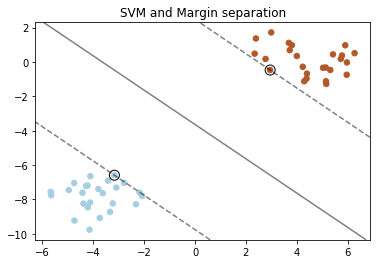

In [29]:
plt.scatter(X_lsvm[:, 0], X_lsvm[:, 1], c=y_lsvm, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM and Margin separation")
plt.show()

### 3.5. Coding our SVM (using unconstrained Soft SVM formulation)

#### 3.5.1 Main class of the model

In [30]:
class MyLinearSVM:
    def __init__(self, n_iter, lr, C=0.1):
        """
        A class for linear SVM model
        
        n_iter: (integer)
            Number of training iteration
        lr: (float)
            learning rate
        C: (float)
            regularization weight
        """ 
 
        self.n_iter = n_iter
        self.lr = lr
        self.C = C 
        
        self.losses = []
        self.grads = []

    def init_params(self, n_feats):
        self.w = np.zeros((1, n_feats))
        self.b = 0

    def _optimize(self, X, y):
        m = X.shape[0]
    
        dist = 1. - y*(np.dot(self.w, X.T) + self.b)
        dist[dist < 0] = 0
        # cost function 
        cost = 0.5 * np.dot(self.w, self.w.T) + self.C * np.mean(dist)
        
        # computing the gradient 
        dw = 0; db = 0
        for i, d in enumerate(np.squeeze(dist)):
            if d != 0:
                dw += self.w - self.C* np.squeeze(y)[i]* X[i]
                db +=   -self.C* np.squeeze(y)[i]
            else:
                dw += self.w 
                db +=  0
        
        dw *=  (1./m)
        db *=  (1./m)
        
        grads = {"dLdw": dw, "dLdb": db}
        
        return grads, cost

    def activation(self, X):  
        """
            Computing the prediction rule of the SVM
            
            X: (np-array), shape=(n_samples x n_feats)
                data matrix
            
        """
        return np.sign(np.dot(self.w, X.T) + self.b)
    
    def fit(self, X, y):
        """
            Training the model
            
            X: (np-array), shape=(n_samples x n_feats)
                data matrix
            y: (np-array), shape=(n_samples)
                targets 
        """
        assert len(np.unique(y)) == 2, "More than two labels in y %s"%(np.unique(y))
        labels = list(np.squeeze(np.unique(y)))
        remapped_labels = y
        if labels != [-1, 1]:
            remapped_labels = np.zeros_like(y)
            remapped_labels[y == np.unique(y)[0]] = 1
            remapped_labels[y == np.unique(y)[1]] = -1
        
        self.init_params(X.shape[1])
        
        for i in range(self.n_iter):
            grads, cost = self._optimize(X, remapped_labels)
            #
            dLdw = grads['dLdw']
            dLdb = grads['dLdb']
            
            # gradient descent
            self.w = self.w - self.lr * dLdw
            self.b = self.b - self.lr * dLdb
            
            self.losses.append(cost)
            self.grads.append(grads)
            #if (i % 10 == 0):
            #    print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
            
        print("Standard Logistic Regression: Iter {}, Cost {}".format(i, cost))
    
    def predict(self, X):
        """
            Predicting the discrete labels
            
            X: (array, n_samples x n_feats)
                data matrix 
        """
        return self.activation(X)
    
    def predict_proba(self, X):
        
        """
            Predicting the probabilities

            X: (np-array), shape=(n_samples x n_feats)
                data matrix 
        """
        return self.activation(X) 
    
    def score(self, X, y): 
        """
            computing the accuracy of the model
            
            X: (np-array), shape=(n_samples x n_feats)
                data matrix
        """
        pred = self.predict(X)
        return (pred == y).mean()
    

#### 3.5.2 Training the model and printing its decision boundary

Standard Logistic Regression: Iter 9999, Cost [[0.03118399]]


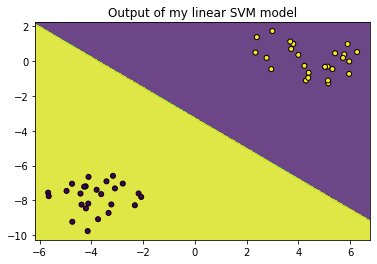

In [31]:
my_lsvm = MyLinearSVM(10000, 0.01, 10)
my_lsvm.fit(X_lsvm, y_lsvm)
print_decision(X_lsvm, y_lsvm, my_lsvm, "Output of my linear SVM model")

#### 3.5.2 Comparing with a Standard Binary Logistic Regressor

In [32]:
my_blr = MyBinaryLogisticRegression(1000, 0.1, r_lambda=0)

Standard Logistic Regression: Iter 999, Cost 0.0009204360193738721


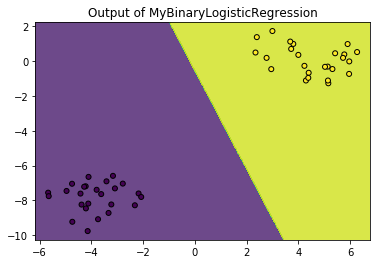

In [33]:
my_blr.fit(X_lsvm, y_lsvm)
print_decision(X_lsvm, y_lsvm, my_blr, "Output of MyBinaryLogisticRegression")

## 4. <a class="anchor" id="ksvm">Kernel SVM</a>

In this section, let $\mathcal{D} = \{(\mathbf{x}_i \in \mathbb{R}^d, y_i \in \{-1, 1\})\}_{i=1}^n$ be our training dataset. The samples are **i.i.d**.

In the previous sections:
- we have seen that we can find a linear classifier that can separate our datasets,
- We added in the SVM section a term that allows us to maximize the margin so as to have robust models.

All these models assumes that the data is actually **linearly separable**. However, in practice the data are generaly not linearly separable.
> Question: **How to adapt our models to handle non-linearly separable datasets?**

The main technique is to transform the data, using a mapping $\Phi$, from the input space to some (high-dimensional) **feature space**. See the figure below for more detail.

<img src="images/kernel_trick_1.png">

### 4.1 Formulation

#### 4.1.2 Introducing the kernels

In the context of  SVMs, the mapping is obtained using **kernels**.

> Recall that the Dual optimization problem of the Soft SVM is given by 
$$
\begin{equation*}
    \begin{split}
        \underset{\alpha}{\text{maximize }} & \sum_{i=1}^n \alpha_i    - \frac{1}{2} \sum_{i=1, j=1}^n \alpha_i \alpha_j y_i y_j \langle \mathbf{x}_i, \mathbf{x}_j \rangle\\
        & \text{s.t. } \quad \sum_{i=1}^n \alpha_i y_i = 0  \quad \forall i \in \{1, \cdots, n\}\\
        & \quad \quad 0 \le \alpha_i \le C \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation*}
$$

To use our transformation trick, we only need to change our dot product between the samples, that is:
> We replace $\langle \mathbf{x}_i, \mathbf{x}_j \rangle$ by $\langle \Phi(\mathbf{x}_i), \Phi(\mathbf{x}_j )\rangle, \ \forall i,j \in \{1, \cdots, n\}.$

> We define the kernel function $k$ as
$$
    (\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') =  \langle \Phi(\mathbf{x}), \Phi(\mathbf{x}' )\rangle.
$$

> We can update our previous Dual to obtain the Kernelized Soft SVM  problem 
$$
\begin{equation*}
    \begin{split}
        \underset{\alpha}{\text{maximize }} & \sum_{i=1}^n \alpha_i  - \frac{1}{2} \sum_{i=1, j=1}^n \alpha_i \alpha_j y_i y_j   k(\mathbf{x}_i, \mathbf{x}_j)  \\
        & \text{s.t. } \quad \sum_{i=1}^n \alpha_i y_i = 0  \quad \forall i \in \{1, \cdots, n\}\\
        & \quad \quad 0 \le \alpha_i \le C \quad \forall i \in \{1, \cdots, n\}
    \end{split}
\end{equation*}
$$

Consequently our kernelized prediction functio is of the form
$$
f(\mathbf{x}; \theta = \{\mathbf{w}, b\} ) = sign(\langle \mathbf{x}, \mathbf{w} \rangle + b) = sign( \sum_{i=1}^n \alpha_i y_i k(\mathbf{x}, \mathbf{x}_i) + b),
$$
where we replaced $\mathbf{w}$ by its obtained value $\sum_{i=1}^n \alpha_i y_i \mathbf{x}_i$.

The class of query $\mathbf{x}$ is obtain by computing a **similarity** (given by the kernel) between $\mathbf{x}$ and the labeled training samples $\mathbf{x}_i$.
> Recall that only the $\alpha_i$'s associated to the support vectors are not null.

#### 4.1.2 Mercer's Theorem and importance

> **Valid kernels** Let $k: \mathbb{R}^d \times \mathbb{R}^d \to \mathbb{R}$. The Mercer's theorem states that for $k$ to be a *valid (Mercer) kernel* (*i.e.* there exists $\Phi$ such that $k(\mathbf{x}, \mathbf{x}') = \langle \Phi(\mathbf{x}), \Phi(\mathbf{x}') \rangle$) it is necessary and sufficient that its corresponding matrix is symetric positive semi-definite, for any $\{\mathbf{x}_i\}_{i=1}^n (n < \infty ).$

Therefore, we no longer need to find the explicit representation $\Phi$ of a kernel $k$ to assess its validity. We only need to verify that a matrix is symetric positive semi-definite.

#### 4.1.3 Example of kernels

- The linear kernel: 
$$(\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') = \langle \mathbf{x}, \mathbf{x}' \rangle, $$
- The polynomial kernel (parameterized by the degree $p$ and constance $c$): 
$$(\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') = (c + \langle \mathbf{x}, \mathbf{x}' \rangle)^p, $$
- The Gaussian kernel (*a.k.a* the radial basis function, RBF) (parameterized by the standard deviation $\sigma$): 
$$(\mathbf{x}, \mathbf{x}') \mapsto k(\mathbf{x}, \mathbf{x}') = \exp(-\frac{\| \mathbf{x} - \mathbf{x}' \|_2^2}{2\sigma^2}). $$

### 4.2 Polynomial Kernel and Interpretation

Let's consider the polynomial kernel (with $c \ge 0$): *i.e* $k(\mathbf{x}, \mathbf{x}') = (c + \langle \mathbf{x}, \mathbf{x}' \rangle)^p.$

We will now try to retrieve the expression of the transformation $\Phi$ associated to the polynomial kernel $k$.

First we will add a $\sqrt{c}$ in the first dimension of the inputs, so as to have $k(\mathbf{x}, \mathbf{x}') = (\langle \mathbf{x}, \mathbf{x}' \rangle)^p,$ with $\mathbf{x} = [\sqrt{c}, x_1, \cdots, x_d]$. 

>$$
\begin{equation*}
    \begin{split}
        k(\mathbf{x}, \mathbf{x}') &=  (\langle \mathbf{x}, \mathbf{x}' \rangle)^p \\
        &= \big(\langle \mathbf{x}, \mathbf{x}' \rangle \big) \cdots \big(\langle \mathbf{x}, \mathbf{x}' \rangle\big) \\
        &= \big(\sum_{k_1=0}^d \mathbf{x}[k_1] \mathbf{x}'[k_1] \big) \cdots \big(\sum_{k_p=0}^d \mathbf{x}[k_p] \mathbf{x}'[k_p] \big) \\
        &= \sum_{\mathbf{k} =\{k_1, \cdots, k_p\} \in \{0, \cdots, d\}^p} \big(\Pi_{i=1}^p \mathbf{x}[k_i] \mathbf{x}'[k_i] \big),\\
        &= \sum_{\mathbf{k} = \{k_1, \cdots, k_p\} \in \{0, \cdots, d\}^p} \big(\Pi_{i=1}^p \mathbf{x}[k_i]  \big) \big( \Pi_{i=1}^p \mathbf{x}'[k_i] \big),\\
        &= \sum_{ \mathbf{k} \in \{0, \cdots, d\}^p} \phi_{\mathbf{k}} (\mathbf{x}) \phi_{\mathbf{k}} (\mathbf{x}'),\\
        &= \langle \Phi(\mathbf{x}), \Phi(\mathbf{x}') \rangle ,
    \end{split}
\end{equation*}
$$
 where $\Phi(\mathbf{x}) = \{\phi_{\mathbf{k}} (\mathbf{x} )\}_{ \mathbf{k} \in \{0, \cdots, d\}^p}$.

- Notice that $\text{dim}(\Phi) = (d+1)^p$,
- $\Phi(\mathbf{x})$ is a vector containing all monomial of degree (maximum) $p$.

### 4.3 Gaussian Kernel (Radial Basis Functions, RBF) and Interpretation

In practice the polynomial kernel is very powerful, however, not all dataset can be separate with a polynomial curve. 
- **We need more complex separation curves.** (See the illustration below)

<img src="images/kernel_trick_2bis.png" width="70%" >

Let's consider now the Gaussian Kernel (also known as radial basis functions, RBF): 
*i.e.* $k(\mathbf{x}, \mathbf{x}') = \exp(-\frac{\| \mathbf{x} - \mathbf{x}' \|_2^2}{2\sigma^2}).$

Notice that if $\frac{\| \mathbf{x} - \mathbf{x}' \|_2}{\sigma} \gg 1 $ then $k( \mathbf{x}, \mathbf{x}') \approx  0$,
- Meaning, the points are $\ell_2$-far away from each other do not interact.

Whereas, if $\frac{\| \mathbf{x} - \mathbf{x}' \|_2}{\sigma} \ll 1$ then $k( \mathbf{x}, \mathbf{x}') \approx 1 - \frac{\| \mathbf{x} - \mathbf{x}' \|_2^2}{2\sigma^2} $ (the first two terms of the Taylor series of $\exp$),
- In other words,  when the samples are very close, the Gaussian kernel behaves like a $\ell_2$-norm.
- Therefore, if we consider a $d$-dimensional ball of radius $\sigma$, the Gaussian kernel act like a linear separator in that ball. 

We have seen that for points that are close, the Gaussian kernel behaves like a $\ell_2$-norm

<img src="images/kernel_trick_2.png">

### 4.4 Existance of the transformation $\Phi$

We have seen that using certain type of transformation, which can be implicitly obtained from a kernel function, we can **linearize** the problem and find a hyperplane that can separate the data, even for very complex data.

> **Question**: **Can we always find a $\Phi$ that can linearize the our problem?**

> **Answer**: **Yes**, if the samples $\{\mathbf{x}_i\}_{i=1}^n$ are **linearly independent**.

> And, we need $\dim(\Phi) \ge n$ to have a guarantee that the linearization is possible. However, taking a such large dimensional transformation is not a good thing to do, cause we will end up with a very high variance in our estimator (see the bias-variance and estimation theory for more details about this concept). 

### 4.4 Example 1 (using randomly generated non-linearly seperable dataset)

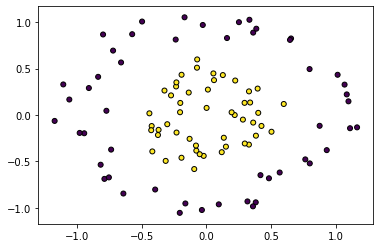

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
X_ksvm, y_ksvm = make_circles(100, factor=.4, noise=.1)

plt.figure()
plt.scatter(X_ksvm[:, 0], X_ksvm[:, 1], c=y_ksvm, edgecolors='black', s=25) 
plt.show()

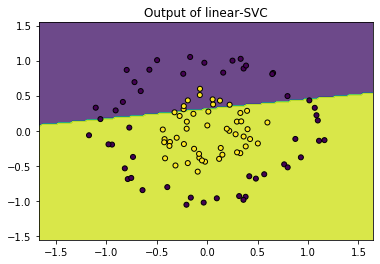

In [35]:
kernel_svm_clf = svm.SVC(kernel='linear', C=100)
kernel_svm_clf.fit(X_ksvm, y_ksvm)
print_decision(X_ksvm, y_ksvm, kernel_svm_clf, "Output of linear-SVC")

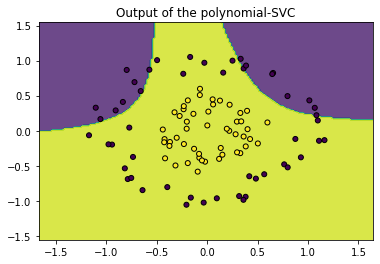

In [36]:
kernel_svm_clf = svm.SVC(kernel='poly', C=100)
kernel_svm_clf.fit(X_ksvm, y_ksvm)
print_decision(X_ksvm, y_ksvm, kernel_svm_clf, "Output of the polynomial-SVC")

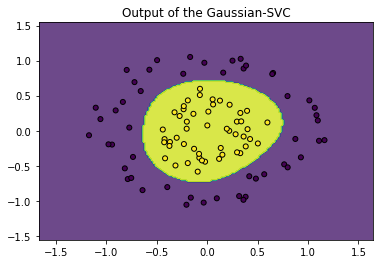

In [37]:
kernel_svm_clf = svm.SVC(kernel='rbf', C=100)
kernel_svm_clf.fit(X_ksvm, y_ksvm)
print_decision(X_ksvm, y_ksvm, kernel_svm_clf, "Output of the Gaussian-SVC")

## 5. Decision Trees and Random Forests

## 6. Clustering (K-Means)